In [4]:

import sys
import pandas as pd
import datetime
import requests
import json
import numpy as np
from pandas import ExcelWriter
import os
import glob
import pytz
from dateutil.tz import gettz
import timeit
# from datetime import datetime
from datetime import timedelta
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
def read_data(devid, acc_token, address, start_time, end_time):
    df=pd.DataFrame([])
    r2 = requests.get(
        url=address + "/api/plugins/telemetry/DEVICE/" + devid + "/values/timeseries?keys=cnrgA,cnrgB,cnrgC&startTs=" + start_time + "&endTs=" + end_time + "&agg=NONE&limit=1000000",
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    if r2:
        
        # read all descriptors at once
        for desc in r2.keys():
            print()
            df1 = pd.DataFrame(r2[desc])
            df1.set_index('ts', inplace=True)
            df1.columns = [desc]
            df = pd.concat([df,df1], axis = 1)
                   

        if df.empty == False:
        
            df.reset_index(drop=False, inplace=True)
            #df['ts'] = pd.to_datetime(df['ts'], unit='ms')
            
    
            # Set timestamp as index, convert all columns to float
            df = df.sort_values(by=['ts'])
            #df['ts'] = df['ts'].dt.tz_localize('utc').dt.tz_convert(tmzn)
            df.reset_index(drop=True, inplace=True)
            df.set_index('ts',inplace = True, drop = True)
            for col in df.columns:
                df[col] = df[col].astype('float')
    return df

In [82]:
did ={'102.107.000082':'e6914c80-070e-11ea-a66e-7bc859fa1c1b','102.201.000652':'c4e27d70-07a4-11ea-a66e-7bc859fa1c1b','102.201.000659':'bd2e4aa0-07a4-11ea-a66e-7bc859fa1c1b','102.201.000660':'c02d80e0-07a4-11ea-a66e-7bc859fa1c1b','102.201.000661':'c00addb0-07a4-11ea-a66e-7bc859fa1c1b','102.105.000231':'ddd387c0-07a4-11ea-a66e-7bc859fa1c1b','102.105.000232':'de935550-07a4-11ea-a66e-7bc859fa1c1b'}

In [163]:
devid = did['102.105.000232'] 
start_time = '1602174600000' # 8th Oct 2020
end_time = '1603233600000' # 21th Oct 2020 


#address = "http://157.230.210.37:8081"
address = "https://m3.zeb.gr"


r = requests.post(address + "/api/auth/login",json={'username': 'a.papagiannaki@meazon.com', 'password': 'eurobank'}).json()


# acc_token is the token to be used in the next request
acc_token = 'Bearer' + ' ' + r['token']

df = read_data(devid, acc_token, address, start_time, end_time)
df.head()

,cnrgA,cnrgB,cnrgC
ts,,,
1602174619000,37168155.0,30183635.0,35043424.0
1602174919000,37168155.0,30183635.0,35043426.0
1602175219000,37168155.0,30183635.0,35043428.0
1602175519000,37168155.0,30183635.0,35043430.0
1602175820000,37168155.0,30183635.0,35043432.0


In [164]:
febts1 = 1613721540000 

In [165]:
df.sort_values(by='cnrgA',inplace=True)


In [166]:
df.head()

,cnrgA,cnrgB,cnrgC
ts,,,
1602174619000,37168155.0,30183635.0,35043424.0
1602196579000,37168155.0,30183636.0,35043574.0
1602196879000,37168155.0,30183636.0,35043576.0
1602197179000,37168155.0,30183636.0,35043579.0
1602197479000,37168155.0,30183636.0,35043581.0


In [167]:
tmp = df.loc[df['cnrgA']>40000000] #40
tmp   = tmp.sort_index()
octss1 = tmp.index[0]
list_ind = list(tmp.index)
tmp.head()

,cnrgA,cnrgB,cnrgC
ts,,,
1602175860000,40456586.0,33210353.0,38479944.0
1602176217000,40457616.0,33211277.0,38480973.0
1602176517000,40457766.0,33211410.0,38481127.0
1602176817000,40458430.0,33212006.0,38481793.0
1602177117000,40458634.0,33212186.0,38482001.0


In [168]:
with open('janus_restore/listind_232.txt', 'w') as filehandle:
    for listitem in list_ind:
        filehandle.write('%s\n' % listitem)

In [169]:
tmp['ts'] = tmp.index
tmp['ts'] = tmp['ts']+(febts1-octss1)
tmp.set_index('ts',inplace=True,drop=True)
tmp.head()

,cnrgA,cnrgB,cnrgC
ts,,,
1613721540000,40456586.0,33210353.0,38479944.0
1613721897000,40457616.0,33211277.0,38480973.0
1613722197000,40457766.0,33211410.0,38481127.0
1613722497000,40458430.0,33212006.0,38481793.0
1613722797000,40458634.0,33212186.0,38482001.0


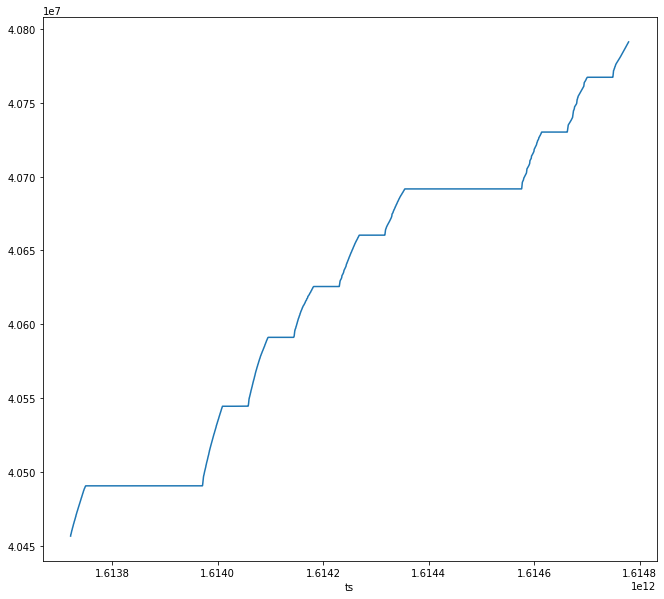

In [170]:
tmp['cnrgA'].plot(figsize=[11,10])

In [171]:
start_time = '1613718000000' # 8th Oct 2020
end_time = '1614783600000' # 21th Oct 2020 


#address = "http://157.230.210.37:8081"
address = "https://m3.zeb.gr"


r = requests.post(address + "/api/auth/login",json={'username': 'a.papagiannaki@meazon.com', 'password': 'eurobank'}).json()


# acc_token is the token to be used in the next request
acc_token = 'Bearer' + ' ' + r['token']

df2 = read_data(devid, acc_token, address, start_time, end_time)
# df2

In [172]:
df2 = pd.concat([df2,dfwrong])
df2.sort_index(inplace=True)
df2.head(20)

,cnrgA,cnrgB,cnrgC
ts,,,
1613718279000,40452031.0,33206172.0,38475285.0
1613718579000,40452849.0,33206927.0,38476118.0
1613718879000,40452999.0,33207061.0,38476273.0
1613719179000,40453735.0,33207743.0,38477024.0
1613719479000,40453884.0,33207879.0,38477179.0
1613719779000,40454565.0,33208506.0,38477875.0
1613720079000,40454764.0,33208689.0,38478081.0
1613720379000,40455355.0,33209230.0,38478684.0
1613720679000,40455651.0,33209502.0,38478989.0


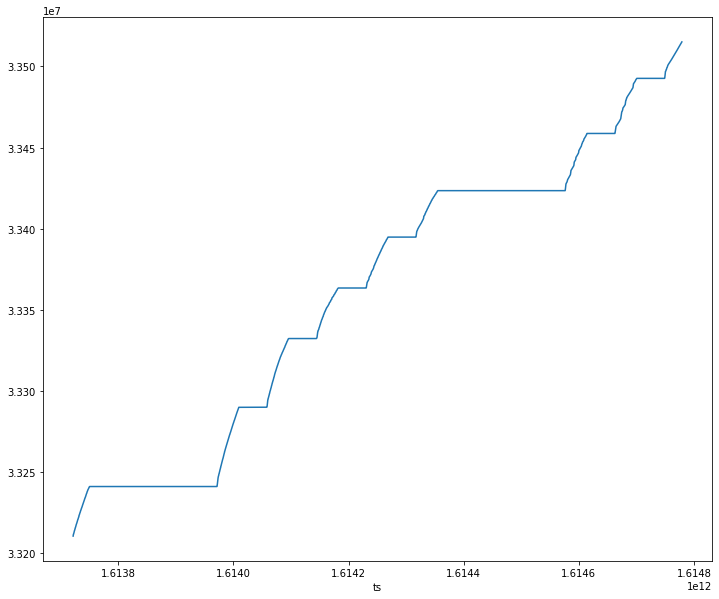

In [173]:
tmp['cnrgB'].plot(figsize=[12,10])

In [174]:
tmp['cnrgA'] = tmp['cnrgA'].astype(int)
tmp['cnrgB'] = tmp['cnrgB'].astype(int)
tmp['cnrgC'] = tmp['cnrgC'].astype(int)

tmp['cnrgA'] = tmp['cnrgA'].apply(str)
tmp['cnrgB'] = tmp['cnrgB'].apply(str)
tmp['cnrgC'] = tmp['cnrgC'].apply(str)
# tmp['ts'] = tmp.index.values.astype(np.int64) // 10 ** 6
# tmp['ts'] = tmp['ts'].astype(int)
# tmp.set_index('ts',inplace = True, drop = True)
nrgdict = tmp.to_dict('index')
nrgdict

{1613721540000: {'cnrgA': '40456586',
  'cnrgB': '33210353',
  'cnrgC': '38479944'},
 1613721897000: {'cnrgA': '40457616',
  'cnrgB': '33211277',
  'cnrgC': '38480973'},
 1613722197000: {'cnrgA': '40457766',
  'cnrgB': '33211410',
  'cnrgC': '38481127'},
 1613722497000: {'cnrgA': '40458430',
  'cnrgB': '33212006',
  'cnrgC': '38481793'},
 1613722797000: {'cnrgA': '40458634',
  'cnrgB': '33212186',
  'cnrgC': '38482001'},
 1613723097000: {'cnrgA': '40459154',
  'cnrgB': '33212655',
  'cnrgC': '38482525'},
 1613723397000: {'cnrgA': '40459734',
  'cnrgB': '33213178',
  'cnrgC': '38483108'},
 1613723697000: {'cnrgA': '40459885',
  'cnrgB': '33213313',
  'cnrgC': '38483262'},
 1613723997000: {'cnrgA': '40460551',
  'cnrgB': '33213911',
  'cnrgC': '38483926'},
 1613724297000: {'cnrgA': '40460702',
  'cnrgB': '33214045',
  'cnrgC': '38484080'},
 1613724597000: {'cnrgA': '40461289',
  'cnrgB': '33214571',
  'cnrgC': '38484667'},
 1613724897000: {'cnrgA': '40461733',
  'cnrgB': '33214968',
  'c

In [175]:
tmp.to_csv('janus_restore/232.csv')
